<a href="https://colab.research.google.com/github/ManelSoengas/Python_LM/blob/main/Python_4_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** Models Avançats i Aplicacions**

---
En aquest mòdul, explorarem models més avançats de Deep Learning, incloent CNN per visió artificial, Transfer Learning amb models pre-entrenats i Xarxes Neuronals Recurrents (RNN) i Transformers per processament de text.


#**Xarxes Neuronals Convolucionals (CNN) per Visió per Ordinador**

---


Ja hem vist com les CNN milloren la classificació d’imatges, però ara veurem com aplicar-les en tasques més complexes.

1. **Aplicació en Visió per Ordinador: Classificació d’Imatges (CIFAR-10)**

El dataset CIFAR-10 conté 60.000 imatges en color de 32x32 píxels classificades en 10 categories (avions, gats, gossos, cotxes, etc.).

***Resultat***: Aquesta CNN pot classificar imatges en 10 categories, però podem millorar-la amb Transfer Learning!

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


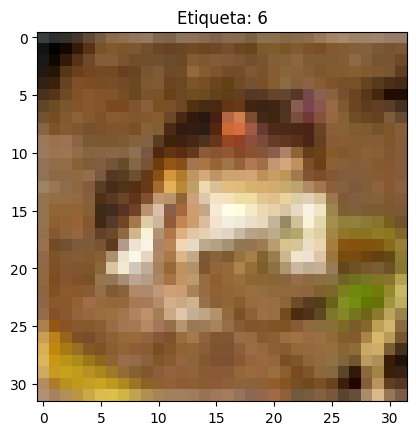

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.3864 - loss: 1.6717 - val_accuracy: 0.5827 - val_loss: 1.1655
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6162 - loss: 1.0979 - val_accuracy: 0.6408 - val_loss: 1.0313
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6728 - loss: 0.9464 - val_accuracy: 0.6583 - val_loss: 0.9824
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7008 - loss: 0.8568 - val_accuracy: 0.6837 - val_loss: 0.9134
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7341 - loss: 0.7678 - val_accuracy: 0.7012 - val_loss: 0.8875
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7603 - loss: 0.6930 - val_accuracy: 0.6946 - val_loss: 0.9186
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7758 - loss: 0.6365 - val_accuracy: 0.6952 - val_loss: 0.9087
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8015 - loss: 0.569

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Carregar CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalització (valors entre 0 i 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Mostrem una imatge d'exemple
plt.imshow(X_train[0])
plt.title(f"Etiqueta: {y_train[0][0]}")
plt.show()

# Definició d'una CNN per CIFAR-10
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar i entrenar el model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


2. **Transfer Learning amb Models Pre-entrenats (ResNet, VGG, EfficientNet)**

El Transfer Learning permet aprofitar models pre-entrenats en bases de dades grans com ImageNet i ajustar-los per a les nostres dades.

- **Utilitzem ResNet50 per Classificació**

ResNet-50 és una xarxa profunda que utilitza connexions residuals per evitar problemes com el gradient vanishing.

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Carregar ResNet50 sense la capa de sortida
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Afegim capes personalitzades
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Definir el nou model
model = Model(inputs=base_model.input, outputs=output)

# Congelar capes pre-entrenades
for layer in base_model.layers:
    layer.trainable = False

# Compilar i entrenar
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 17ms/step - accuracy: 0.2064 - loss: 2.1701 - val_accuracy: 0.2674 - val_loss: 2.0021
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.3094 - loss: 1.9029 - val_accuracy: 0.3147 - val_loss: 1.8723
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3365 - loss: 1.8421 - val_accuracy: 0.3399 - val_loss: 1.8181
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3467 - loss: 1.8054 - val_accuracy: 0.3626 - val_loss: 1.7634
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3655 - loss: 1.7638 - val_accuracy: 0.3835 - val_loss: 1.7280
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3727 - loss: 1.7470 - val_accuracy: 0.3726 - val_loss: 1.7537
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.3717 - loss: 1.7510 - val_accuracy: 0.3798 - val_loss: 1.7226
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3821 - los